<a href="https://colab.research.google.com/github/CarmenTheodoraCraciun/Stroke-Prediction/blob/main/SIIA_Stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting brain stroke risk**

# Dataset

[Dataset 1](https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset)

[Dataset2](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

# ML Project

### Imports

In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib

from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from imblearn.over_sampling import RandomOverSampler  # For oversampling the minority class
from sklearn.tree import DecisionTreeClassifier  # For decision tree classifier
from sklearn import metrics  # For evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For calculating accuracy, classification report, and confusion matrix

from sklearn.ensemble import RandomForestClassifier  # For Random Forest classifier

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Mounted at /content/drive


## Reading datasets

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/An 3. Sem 2/SIIA/project/brain_stroke.csv")
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/An 3. Sem 2/SIIA/project/healthcare-dataset-stroke-data.csv")
df2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Deleting the id column
df2.drop('id', axis=1, inplace=True)

# Merging the data sets
df = pd.concat([df1, df2], ignore_index=True)
df.head()
df.rename(columns={'Residence_type': 'residence'}, inplace=True)

In [ ]:
# To check the  statistical analysis of all numerical type attributes
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,10091.000000,10091.000000,10091.000000,10091.000000,9890.000000,10091.000000
mean,43.322002,0.096819,0.054603,106.046924,28.694267,0.049252
std,22.636479,0.295726,0.227215,45.178794,7.339976,0.216404
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.235000,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.010000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data pre-processing and exploration

### Deleting the dupliates

In [ ]:
df = df.drop_duplicates()

### Find the number of NULL values in each column

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

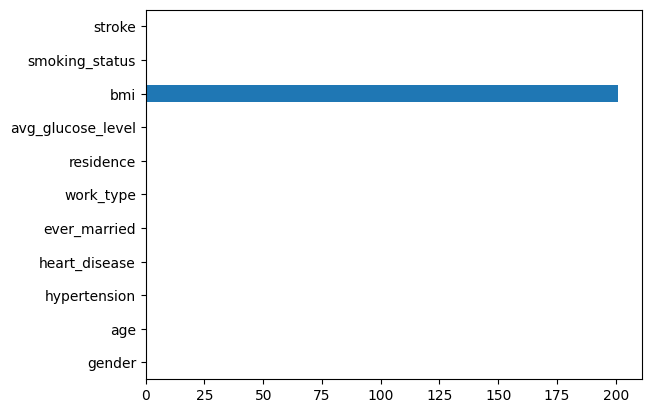

In [ ]:
# Printing the number of N/A values
print(df.isna().sum())
# Graphical representation of the N/A values
df.isna().sum().plot.barh()

The bmi column contains 201 null values, later we will try to predict values for them.

### Gender analysis

In [ ]:
# Checking the values in the gender column
df['gender'].value_counts()

gender
Female    3091
Male      2219
Other        1
Name: count, dtype: int64

We have a Other gender and because is only 1 instance we will remove it as to reduce the dimension of the data frame/

<Axes: ylabel='count'>

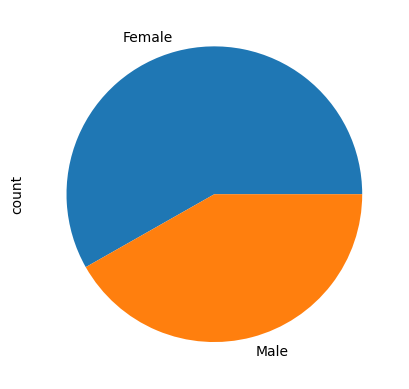

In [ ]:
# Removing the 'other' gender
df = df[df['gender'] != 'Other']

# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

### Converting the object data

In [ ]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5310 entries, 0 to 10086
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5310 non-null   object 
 1   age                5310 non-null   float64
 2   hypertension       5310 non-null   int64  
 3   heart_disease      5310 non-null   int64  
 4   ever_married       5310 non-null   object 
 5   work_type          5310 non-null   object 
 6   residence          5310 non-null   object 
 7   avg_glucose_level  5310 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5310 non-null   object 
 10  stroke             5310 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 497.8+ KB


To be able to work with the data in the columns, we will convert everything to number data (int/float).

In [ ]:
# Making the map
ever_married_map = {'Yes': 1, 'No': 0}
# Apply mapping to the column
df['ever_married'] = df['ever_married'].map(ever_married_map)

gender_map = {'Male': 0, 'Female': 1}
# Apply mapping to the column
df['gender'] = df['gender'].map(gender_map)

# Grouping by residence  to know what values the column stores
residence=df["residence"].value_counts()
print(residence)

residence
Urban    2702
Rural    2608
Name: count, dtype: int64


In [ ]:
residence_map = {'Urban': 1, 'Rural': 0}
# Apply mapping to the column
df['residence'] = df['residence'].map(residence_map)
smoking_status=df["smoking_status"].value_counts()
print(smoking_status)

smoking_status
never smoked       1932
Unknown            1605
formerly smoked     932
smokes              841
Name: count, dtype: int64


In [ ]:
smoking_status_map = {'Unknown': -1, 'never smoked': 0, 'formerly smoked': 1, 'smokes': 2}
# Apply mapping to the column
df['smoking_status'] = df['smoking_status'].map(smoking_status_map)

In [ ]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
work_type_map = {'Private': -1, 'Self-employed': 0, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
# Apply mapping to the column
df['work_type'] = df['work_type'].map(work_type_map)

In [ ]:
df.dtypes # Get the type of the columns after the conversions

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
residence              int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

## Analysis feature

The gender has already been analyzed in pre-processing

### Age

<Axes: xlabel='age', ylabel='Count'>

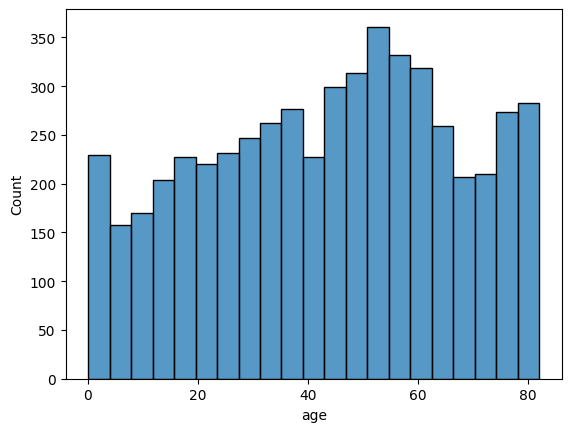

In [ ]:
# Graphical representation fo the data in age column
sns.histplot(data=df['age'])

### Hypertension

<Axes: xlabel='hypertension'>

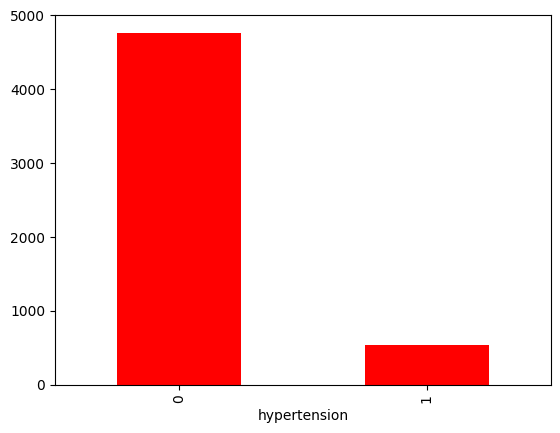

In [ ]:
df['hypertension'].value_counts().plot(kind="bar",color = "red")

### Heart disease

heart_disease
0    5001
1     309
Name: count, dtype: int64 

5.8192090395480225% of people have at least one heart disease.



<Axes: ylabel='count'>

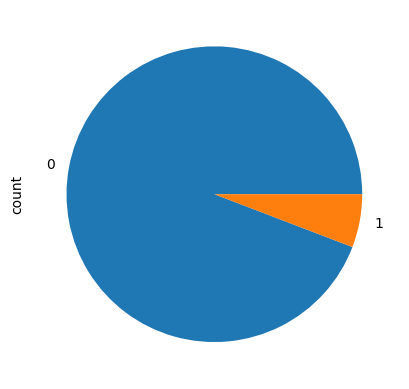

In [ ]:
# Value count of heart disease attribute
print(df['heart_disease'].value_counts(),"\n")

percentage_heart_disease = (df['heart_disease'].value_counts().get(1, 0))/ len(df) *100
print(f"{percentage_heart_disease}% of people have at least one heart disease.\n")

df['heart_disease'].value_counts().plot(kind="pie")

### Ever married

ever_married
1    3502
0    1808
Name: count, dtype: int64 



<Axes: ylabel='count'>

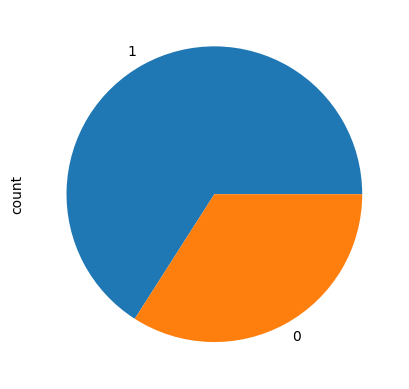

In [ ]:
print(df['ever_married'].value_counts(),"\n")

df['ever_married'].value_counts().plot(kind="pie")

### Work type

work_type
-1    3038
 0     863
 3     703
 2     684
 4      22
Name: count, dtype: int64


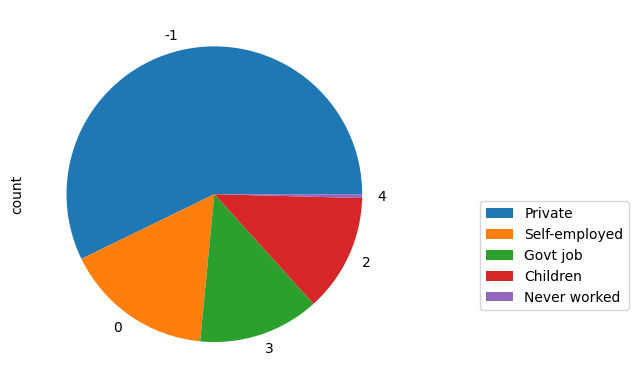

In [ ]:
print(df['work_type'].value_counts())
df['work_type'].value_counts().plot(kind="pie")
# work_type_map = {'Private': -1, 'Self-employed': 0, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
work_type_labels = ['Private', 'Self-employed', 'Govt job', 'Children', 'Never worked']
# Add legend
plt.legend(labels=work_type_labels, bbox_to_anchor=(1.2, 0.5))
plt.show()

### Residence type

residence
1    2702
0    2608
Name: count, dtype: int64


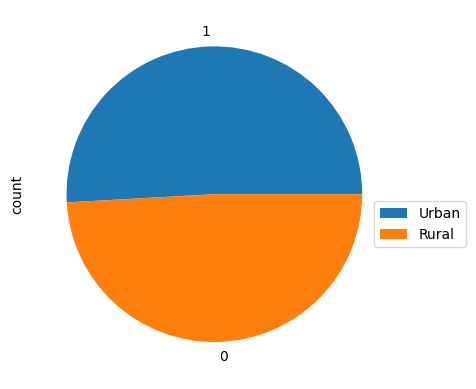

In [ ]:
print(df['residence'].value_counts())
df['residence'].value_counts().plot(kind="pie")
plt.legend(labels=['Urban','Rural'], bbox_to_anchor=(1.2, 0.5))
plt.show()

### Average glucose level

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

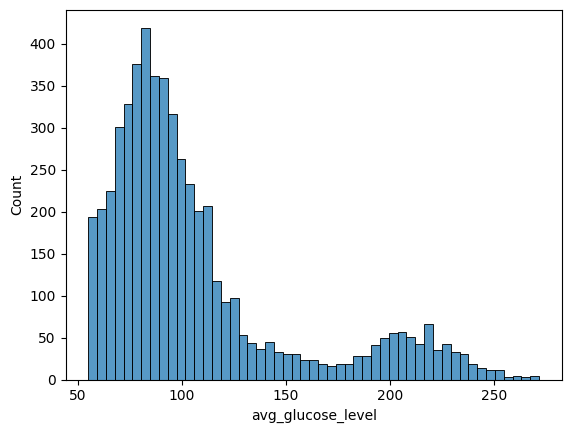

In [ ]:
sns.histplot(data=df['avg_glucose_level'])

In [ ]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

avg_glucose_level
False    4629
True      681
Name: count, dtype: int64

### BMI (Body Mass Index)

$BMI = \frac{weight[kg]}{height^2[m^2]}$

#### Fill the null values

In [ ]:
# Remove the NaN values from the 'bmi' column and keep only this column
df_cleaned = df['bmi'].dropna()

# Calculate quartile
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)

# Calculate IQR (interquartile range)
IQR = Q3 - Q1

# Identifying outliers
outliers = (df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))

outliers_count = outliers.value_counts()
print(outliers_count)

# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("NaN BMI values where people have stroke",df_na['stroke'].sum())
print("BMI values where people have stroke",df['stroke'].sum())

bmi
False    4989
True      120
Name: count, dtype: int64
NaN BMI values where people have stroke 40
BMI values where people have stroke 289


Because we have outliers in the data set, using the mean to replace missing values will result in incorrect estimates of mean values. That is why the use of the median is chosen, it is not so influenced by extreme values.

The median is the value that lies in the middle of an ordered data set and is not significantly affected by the presence of outliers.

The median is 28.3



,bmi
0,36.6
1,32.5
2,34.4
3,24.0
4,29.0
...,...
10020,28.3
10029,28.3
10074,28.3
10080,28.3


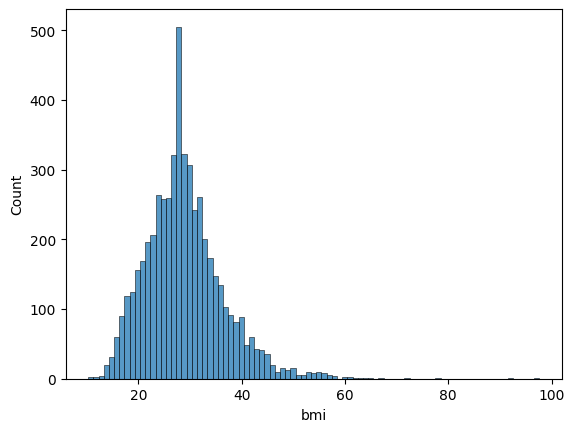

In [ ]:
# Imputing the missing N/A values using the median of bmi column
print(f"The median is {df['bmi'].median()}\n")
df['bmi']=df['bmi'].fillna(df['bmi'].median())
# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])
df[["bmi"]]

### Smoking status

smoking_status
 0    1932
-1    1605
 1     932
 2     841
Name: count, dtype: int64


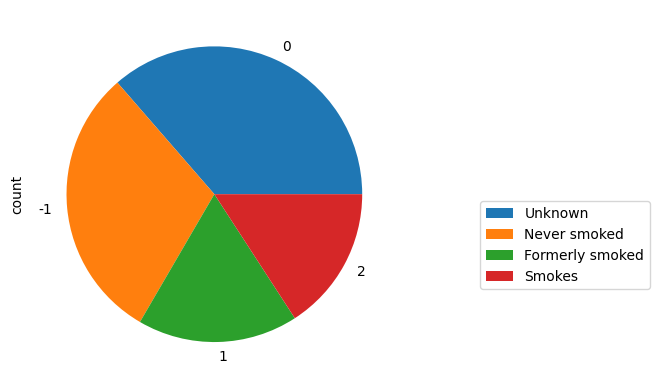

In [ ]:
# Value of count of somoking status attribute
print(df['smoking_status'].value_counts())
# Graphical representation of the value counts of the smoking staus attribute
smoke_status_labels= ['Unknown', 'Never smoked', 'Formerly smoked', 'Smokes']
df['smoking_status'].value_counts().plot(kind="pie")
plt.legend(labels=smoke_status_labels, bbox_to_anchor=(1.2, 0.5))
plt.show()

### Stroke

stroke
0    5021
1     289
Name: count, dtype: int64 

People who got a stroke 5.4%



<Axes: xlabel='stroke'>

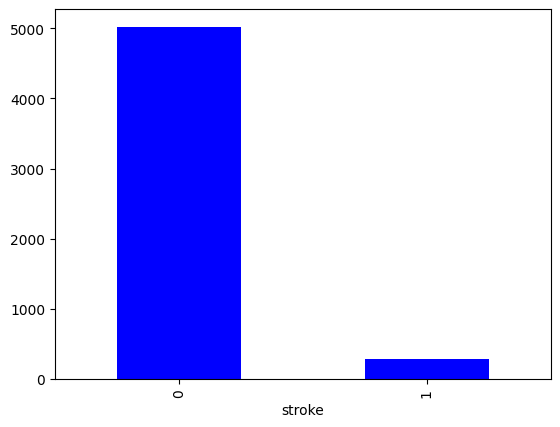

In [ ]:
print(df['stroke'].value_counts(),"\n")
print(f"People who got a stroke {(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100}%\n")

# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "blue")

### Corlation betwen feature

<Axes: >

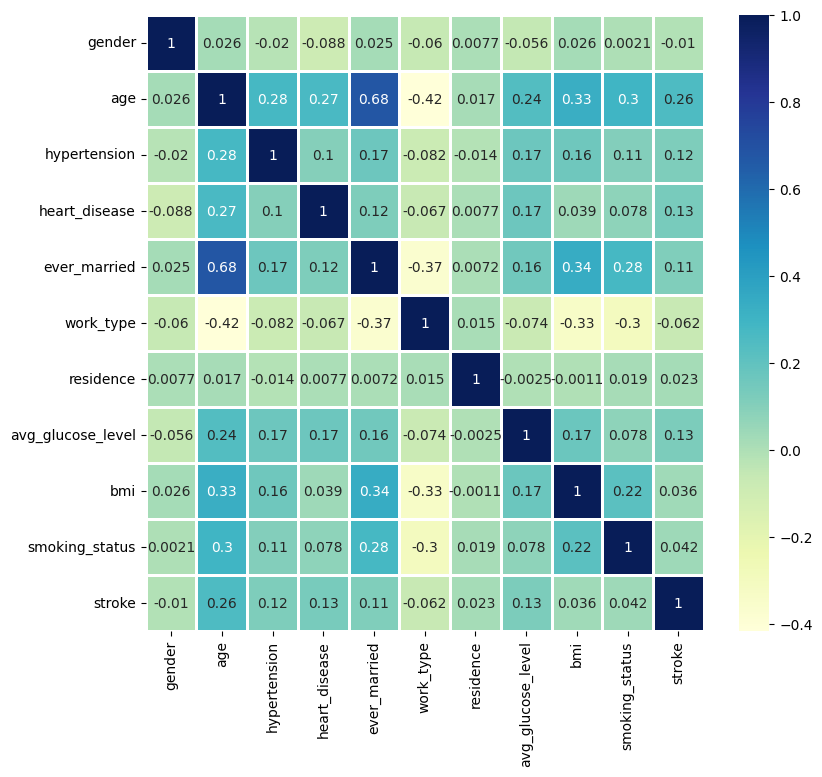

In [ ]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

The correlation matrix is used to understand the relationships between different variables in the data set that appear to be related to health and human behavior.

Each square of the plot represents the correlation coefficient between two variables, with variables listed on both axes: 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence', ' avg_glucose_level', 'bmi', and 'smoking_status'.

Most of the squares are lightly colored, suggesting that many variables have low or no correlation. Some squares, especially those correlating 'ever_married' with 'age', show a stronger positive correlation, as indicated by their darker color. We will delete the column 'ever_married'.

In [ ]:
df.drop('ever_married', axis=1, inplace=True)
df.describe()

,gender,age,hypertension,heart_disease,work_type,residence,avg_glucose_level,bmi,smoking_status,stroke
count,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000
mean,0.582109,43.563819,0.102637,0.058192,0.099247,0.508851,106.919576,28.888814,0.190019,0.054426
std,0.493258,22.661424,0.303512,0.234128,1.528328,0.499969,46.051397,7.580667,1.037012,0.226877
min,0.000000,0.080000,0.000000,0.000000,-1.000000,0.000000,55.120000,10.300000,-1.000000,0.000000
25%,0.000000,26.000000,0.000000,0.000000,-1.000000,0.000000,77.442500,23.900000,-1.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,-1.000000,1.000000,92.070000,28.300000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,2.000000,1.000000,114.522500,32.700000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,2.000000,1.000000


## Cross analysis

### Attributes are compared with stroke

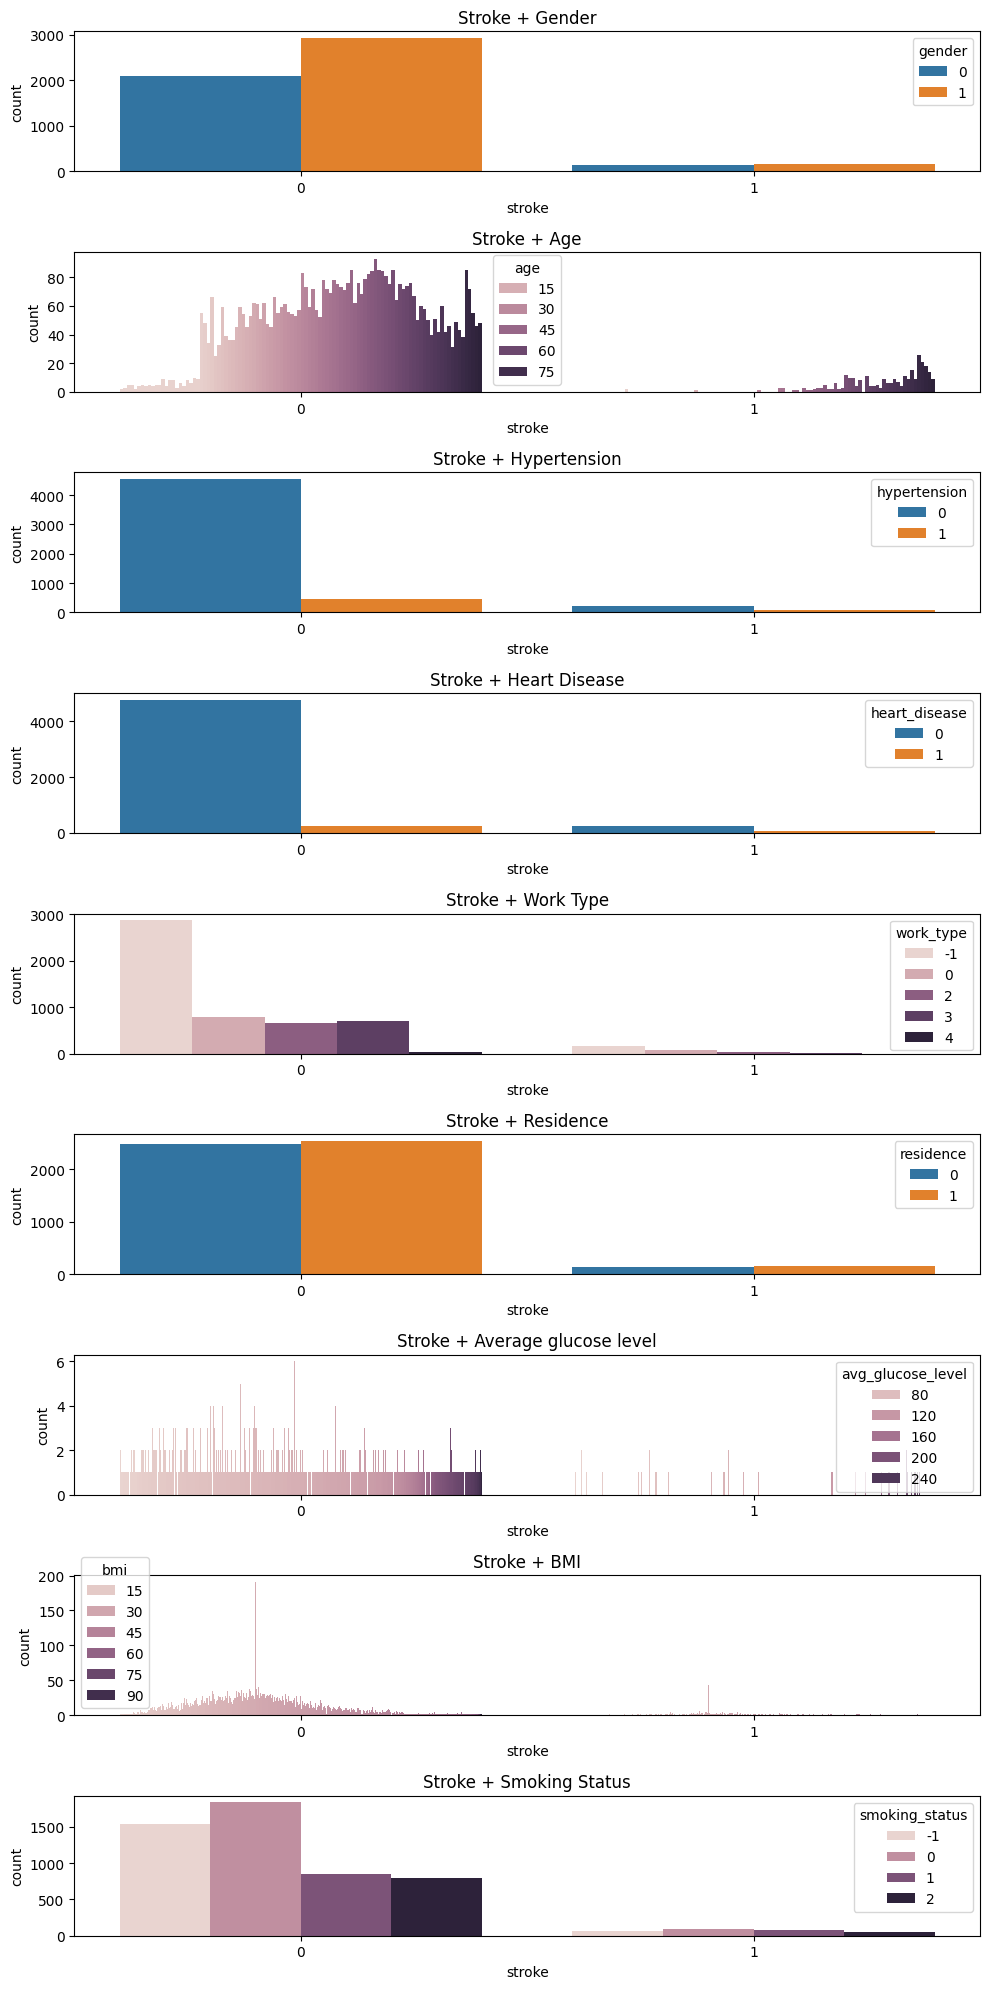

In [ ]:
fig, axs = plt.subplots(nrows=9, figsize=(10, 20))

sns.countplot(x='stroke', hue='gender', data=df, ax=axs[0])
axs[0].set_title('Stroke + Gender')

sns.countplot(x='stroke', hue='age', data=df, ax=axs[1])
axs[1].set_title('Stroke + Age')

sns.countplot(x='stroke', hue='hypertension', data=df, ax=axs[2])
axs[2].set_title('Stroke + Hypertension')

sns.countplot(x='stroke', hue='heart_disease', data=df, ax=axs[3])
axs[3].set_title('Stroke + Heart Disease')

sns.countplot(x='stroke', hue='work_type', data=df, ax=axs[4])
axs[4].set_title('Stroke + Work Type')

sns.countplot(x='stroke', hue='residence', data=df, ax=axs[5])
axs[5].set_title('Stroke + Residence')

sns.countplot(x='stroke', hue='avg_glucose_level', data=df, ax=axs[6])
axs[6].set_title('Stroke + Average glucose level')

sns.countplot(x='stroke', hue='bmi', data=df, ax=axs[7])
axs[7].set_title('Stroke + BMI')

sns.countplot(x='stroke', hue='smoking_status', data=df, ax=axs[8])
axs[8].set_title('Stroke + Smoking Status')

plt.tight_layout()
plt.show()

From the graph it can be understood that, for our data frame:
* We have more women without stoke
* There is definitely a connection between advanced age and the occurrence of stroke
* Very few people who have not been married have strokes, but we know, from the graph of correlations, that age and the fact that a person has ever been married are closely related

### Oversampling

The data set has a clearly visible minority class, we will perform an over-sampling method to have an equal representation of both target classes.

**Oversampling** is a technique used in data processing, especially in the context of class imbalanced datasets, to balance the distribution of classes. When we have a dataset where one or more classes are underrepresented compared to other classes, machine learning models may have difficulty learning these underrepresented classes and may predict incorrectly or inefficiently for these classes.

In [ ]:
# Performing a minority oversamplin
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke'],axis=1)
y=df['stroke']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
X_over

,gender,age,hypertension,heart_disease,work_type,residence,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,-1,1,228.69,36.6,1
1,0,80.0,0,1,-1,0,105.92,32.5,0
2,1,49.0,0,0,-1,1,171.23,34.4,2
3,1,79.0,1,0,0,0,174.12,24.0,0
4,0,81.0,0,0,-1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...
10037,1,79.0,0,1,-1,1,205.33,31.0,2
10038,1,51.0,0,0,2,0,103.43,27.3,1
10039,1,71.0,0,0,2,1,263.32,38.7,0
10040,1,58.0,0,0,-1,0,59.86,28.0,1


In [ ]:
y_over

0        1
1        1
2        1
3        1
4        1
        ..
10037    1
10038    1
10039    1
10040    1
10041    1
Name: stroke, Length: 10042, dtype: int64

## Creating test-train split

In [ ]:
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [ ]:
# Checking the size of the splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (8033, 9)
y_train: (8033,)
X_test: (2009, 9)
y_test: (2009,)


## Training Model

In [ ]:
def evaluate_model(y_true, y_pred):
    '''
    Function is designed to evaluate the performance of a classification model by calculating various metrics such as accuracy, classification report, and confusion matrix.
    The Classification Report provides information on precision, recall and F1 score for each class as well as for the entire data set.
    The confusion matrix provides a more detailed picture of the model's performance, showing the number of correct and incorrect predictions for each class.

    Parameters:
      - y_true = The true labels or ground truth values.
      - y_pred = The predicted labels generated by the model.
    '''
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    # Print classification report
    print("Classification report:")
    print(classification_report(y_true, y_pred))

    # Print confusion matrix
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))

### Decision Tree

Decision trees are supervised learning models used in machine learning that can be used for classification and regression. These trees are a form of decision modeling in the form of a branching tree. Each node of the tree represents a question or statement about the characteristics of the data, and each branch of the tree represents a possible value of that question or statement. The leaves of the tree represent the predicted outcomes or classes.

In [ ]:
# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf = clf.fit(X_train,y_train)

#predicting result using the test dataset
y_pred = clf.predict(X_test)

In [ ]:
evaluate_model(y_test, y_pred)

Accuracy: 0.9696366351418616
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1004
           1       0.94      1.00      0.97      1005

    accuracy                           0.97      2009
   macro avg       0.97      0.97      0.97      2009
weighted avg       0.97      0.97      0.97      2009

Confusion matrix:
[[ 943   61]
 [   0 1005]]


The decision tree model has an accuracy of about 96,96% and we have:
   * 943 correctly identified negative cases (True Negatives)
   * 1005 correctly identified positive cases (True Positives)
   * 61 incorrectly identified negative cases (False Positives)
   * 0 incorrectly identified positive cases (False Negatives).

#### Regularization

In [ ]:
# Creating a decision tree classifier with regularization
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

# Training the classifier on the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
evaluate_model(y_test, y_pred)

Accuracy: 0.7959183673469388
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1004
           1       0.77      0.85      0.81      1005

    accuracy                           0.80      2009
   macro avg       0.80      0.80      0.80      2009
weighted avg       0.80      0.80      0.80      2009

Confusion matrix:
[[742 262]
 [148 857]]


### Random Forests

In [ ]:
# Creating the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Making predictions on test data
y_pred = clf.predict(X_test)

evaluate_model(y_test, y_pred)

Accuracy: 0.9895470383275261
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1004
           1       0.98      1.00      0.99      1005

    accuracy                           0.99      2009
   macro avg       0.99      0.99      0.99      2009
weighted avg       0.99      0.99      0.99      2009

Confusion matrix:
[[ 983   21]
 [   0 1005]]


The accuracy of the model is about 98,95%.

The classification report
* Precision is the proportion of correctly predicted positive examples out of all correctly predicted positive examples. For class 0 (no stroke), the precision is 100%, meaning that all examples predicted as negative are actually negative. For class 1 (with stroke), the precision is 98%, which means that 98% of the samples predicted as positive are actually positive.
* Recall is the proportion of correctly predicted positive examples out of all actual positive examples. For both classes, the recall is about 98–100%, which means that the model correctly predicted most of the positive examples.
* The F1-score is a weighted average of precision and recall and provides a measure of a classifier's performance. For both classes, the F1-score is around 99%, indicating a good balance between precision and recall.

The confusion matrix
* 983 correctly identified negative cases (True Negatives)
* 1005 correctly identified positive cases (True Positives)
* 21 incorrectly identified negative cases (False Positives)
* 0 incorrectly identified positive cases (False Negatives)